In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn import metrics
import math

df= pd.read_csv('oil production dataset.csv')
df

,Year,Production
0,1961,2.15
1,1962,2.23
2,1963,2.23
3,1964,2.31
4,1965,2.09
5,1966,2.02
6,1967,2.32
7,1968,2.16
8,1969,2.26
9,1970,2.71


array([[<AxesSubplot: title={'center': 'Production'}>]], dtype=object)

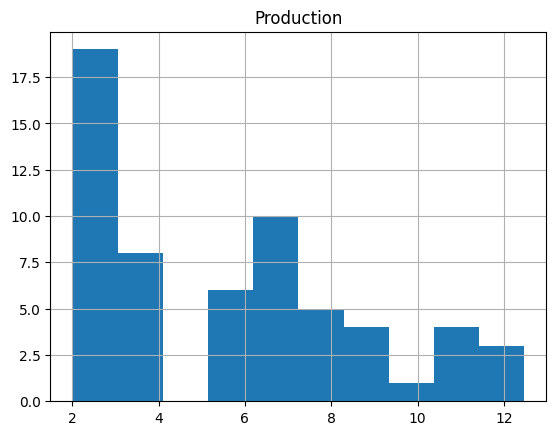

In [3]:
df.hist('Production')

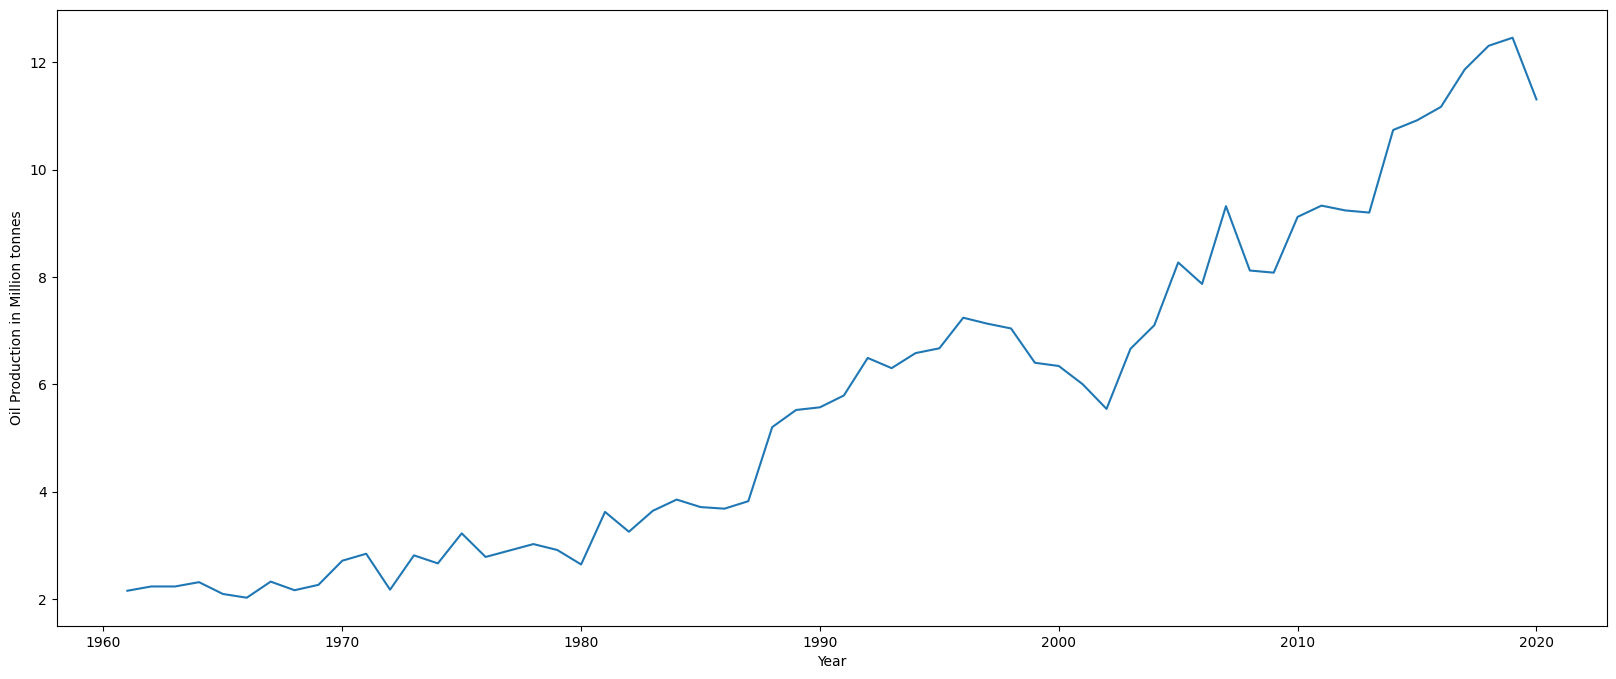

In [4]:
plt.figure(figsize=(20,8))
plt.plot(df['Year'],df['Production'])
plt.xlabel('Year')
plt.ylabel('Oil Production in Million tonnes')
plt.show()

In [5]:
train = df.iloc[0:52,1]
test = df.iloc[52:60,1]
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (52,)
Test Shape :  (8,)


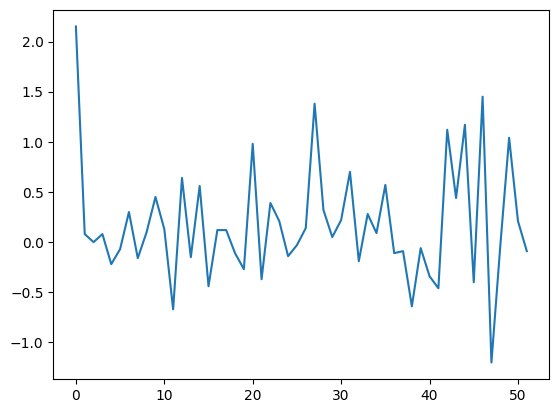

In [6]:
df_d = train.diff().fillna(train)
plt.plot(df_d)
plt.show()

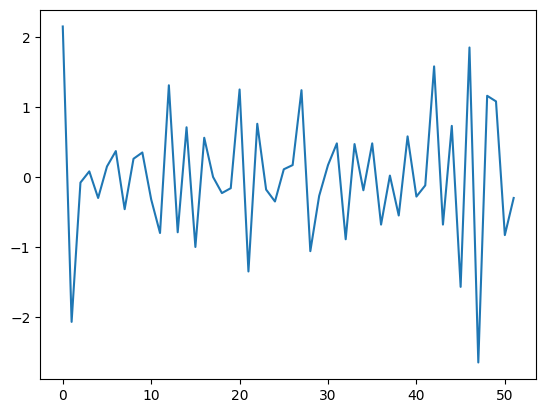

In [7]:
df_d1 = df_d.diff().fillna(df_d)
plt.plot(df_d1)
plt.show()

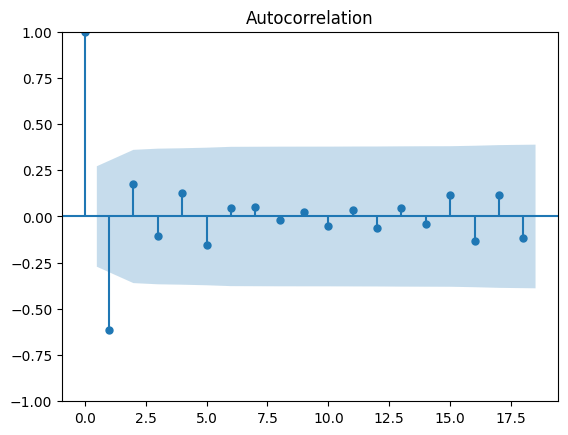

In [8]:
plot_acf(df_d1)
plt.show()

C:\Users\20nis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


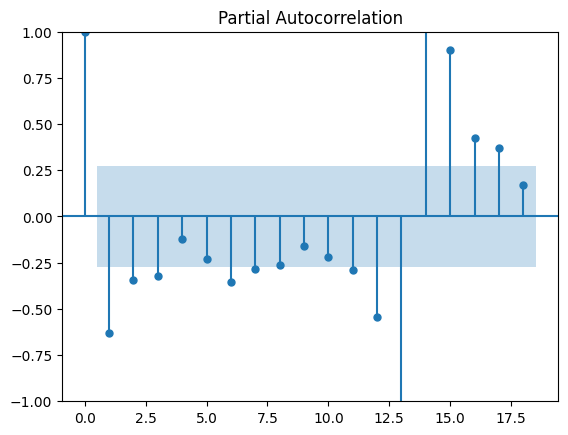

In [9]:
plot_pacf(df_d1)
plt.show()

In [10]:
model1 = ARIMA(train, order= (5,2,0))
model_fit1 = model1.fit()
model_fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   52
Model:                 ARIMA(5, 2, 0)   Log Likelihood                 -42.154
Date:                Thu, 22 Dec 2022   AIC                             96.309
Time:                        00:58:42   BIC                            107.781
Sample:                             0   HQIC                           100.677
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9987      0.139     -7.175      0.000      -1.271      -0.726
ar.L2         -0.6914      0.158     -4.362      0.000      -1.002      -0.381
ar.L3         -0.4219      0.223     -1.890      0.059      -0.859       0.016
ar.L4         -0.1524      0.234     -0.650      0.515      -0.612       0.307
ar.L5         -0.1294      0.158     -0.821      0.412      -0.438       0.180
sigma2         0.3085      0.057      5.414      0.000       0.197       0.420
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 3.31
Prob(Q):                              0.65   Prob(JB):                         0.19
Heteroskedasticity (H):               5.51   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start = 53
end = 60
yhat = model_fit1.predict(start = start, end = end, typ = 'levels')
print(yhat)

53     9.887454
54    10.090551
55    10.386219
56    10.648590
57    10.835690
58    11.118385
59    11.351199
60    11.592595
Name: predicted_mean, dtype: float64


In [12]:
MSE = metrics.mean_squared_error(test,yhat)
RMSE = math.sqrt(MSE)
MAE = metrics.mean_absolute_error(test,yhat)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MAE:  0.7511768658427995
MSE:  0.656276308443665
RMSE:  0.8101088250622043


In [123]:
def objective_function(parameters):
    # unpack the parameters
    p, d, q = parameters
    # make sure that the parameters are integers
    p = 5
    d = 2
    q = 0
    # try fitting an ARIMA model with the given parameters
    try:
        model = ARIMA(df['Production'].values, order=(p, d, q))
        model_fit = model.fit(disp=False)
    except:
        # if the model cannot be fit, return a large error
        return np.inf
    # return the AIC of the fitted model
    return model_fit.aic

# define the lower and upper bounds for the p, d, and q parameters
lower_bounds = np.array([0, 2, 0])
upper_bounds = np.array([5, 2, 5])

# number of particles in the swarm
num_particles = 100
# number of dimensions (p, d, q)
num_dimensions = 3
# maximum velocity
max_velocity = 0.5 * (upper_bounds - lower_bounds)
# maximum acceleration
max_acceleration = 0.5 * max_velocity
# maximum number of iterations
max_iterations = 200

# initialize the positions and velocities of the particles
positions = lower_bounds + (upper_bounds - lower_bounds) * np.random.rand(num_particles, num_dimensions)
velocities = -max_velocity + 2 * max_velocity * np.random.rand(num_particles, num_dimensions)

# initialize the best known positions and values for each particle
best_positions = positions.copy()
best_values = np.array([objective_function(pos) for pos in positions])

# initialize the best known position and value overall
global_best_position = best_positions[np.argmin(best_values)]
global_best_value = np.min(best_values)

In [124]:
for iteration in range(max_iterations):
    # update the velocities of the particles
    velocities = velocities + max_acceleration * np.random.rand(num_particles, num_dimensions)
    velocities = np.clip(velocities, -max_velocity, max_velocity)
    # update the positions of the particles
    positions = positions + velocities
    # keep the positions within the bounds
    positions = np.clip(positions, lower_bounds, upper_bounds)
    # evaluate the objective function at the new positions
    values = np.array([objective_function(pos) for pos in positions])
    # update the best known positions and values for each particle
    update_idx = values < best_values
    best_values[update_idx] = values[update_idx]
    best_positions[update_idx] = positions[update_idx]
    # update the best known position and value overall
    if np.min(best_values) < global_best_value:
        global_best_value = np.min(best_values)
        global_best_position = best_positions[np.argmin(best_values)]

# print the optimal parameters and the corresponding loss (AIC)
print("Optimal parameters:", global_best_position)
print("Loss (AIC):", global_best_value)

Optimal parameters: [3.8446068  2.         0.68854243]
Loss (AIC): inf


In [125]:
model = ARIMA(train, order= (4,2,1))
model_fit2 = model.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   52
Model:                 ARIMA(4, 2, 1)   Log Likelihood                 -38.490
Date:                Thu, 22 Dec 2022   AIC                             88.981
Time:                        01:12:53   BIC                            100.453
Sample:                             0   HQIC                            93.349
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2410      0.146     -1.652      0.099      -0.527       0.045
ar.L2          0.0405      0.168      0.240      0.810      -0.290       0.371
ar.L3         -0.0088      0.212     -0.042      0.967      -0.424       0.406
ar.L4          0.0742      0.175      0.425      0.671      -0.268       0.417
ma.L1         -0.9990      4.371     -0.229      0.819      -9.567       7.569
sigma2         0.2508      1.064      0.236      0.814      -1.834       2.336
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.83   Prob(JB):                         0.39
Heteroskedasticity (H):               5.59   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
start = 53
end = 60
yhat = model_fit2.predict(start = start, end = end, typ = 'levels')
print(yhat)

53     9.604623
54     9.741635
55     9.866724
56    10.012332
57    10.153778
58    10.293392
59    10.432213
60    10.572711
Name: predicted_mean, dtype: float64


In [127]:
MSE = metrics.mean_squared_error(test,yhat)
RMSE = math.sqrt(MSE)
MAE = metrics.mean_absolute_error(test,yhat)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MAE:  1.2639797765468512
MSE:  1.9097098059757736
RMSE:  1.381922503607121


In [128]:
model2 = ARIMA(df['Production'], order= (4,2,1))
model_fit2 = model2.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   60
Model:                 ARIMA(4, 2, 1)   Log Likelihood                 -47.890
Date:                Thu, 22 Dec 2022   AIC                            107.779
Time:                        01:13:03   BIC                            120.142
Sample:                             0   HQIC                           112.595
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2080      0.136     -1.526      0.127      -0.475       0.059
ar.L2          0.0094      0.160      0.059      0.953      -0.305       0.324
ar.L3          0.0015      0.200      0.007      0.994      -0.391       0.394
ar.L4          0.1657      0.151      1.095      0.274      -0.131       0.462
ma.L1         -0.9989      2.202     -0.454      0.650      -5.315       3.317
sigma2         0.2837      0.616      0.460      0.645      -0.924       1.491
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.84   Prob(JB):                         0.62
Heteroskedasticity (H):               4.82   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
start = 1
end = 64
yhat2 = model_fit2.predict(start = start, end = end, typ = 'levels')
print(yhat2)

1      3.225000
2      2.310001
3      2.279312
4      2.351382
5      2.138971
        ...    
60    11.828691
61    11.944563
62    12.109984
63    12.048337
64    12.310301
Name: predicted_mean, Length: 64, dtype: float64


In [130]:
year = df['Year'] 

year = pd.DataFrame(year)
dict = {'Year':['2021', '2022','2023','2024']}
year2 = pd.DataFrame(dict)
yhat2 = pd.DataFrame(yhat2)
yhat2 = yhat2.reset_index()
yhat2 = yhat2.drop('index',1)
df3 = pd.concat([year, year2], ignore_index = True)
df3 = df3.reset_index()
df3['Actual'] = df['Production']
df3['Predictions'] = yhat2
df3 = df3.fillna('')
df3

C:\Users\20nis\AppData\Local\Temp\ipykernel_20024\2403010936.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  yhat2 = yhat2.drop('index',1)


,index,Year,Actual,Predictions
0,0,1961,2.15,3.225000
1,1,1962,2.23,2.310001
2,2,1963,2.23,2.279312
3,3,1964,2.31,2.351382
4,4,1965,2.09,2.138971
...,...,...,...,...
59,59,2020,11.31,11.828691
60,60,2021,,11.944563
61,61,2022,,12.109984
62,62,2023,,12.048337


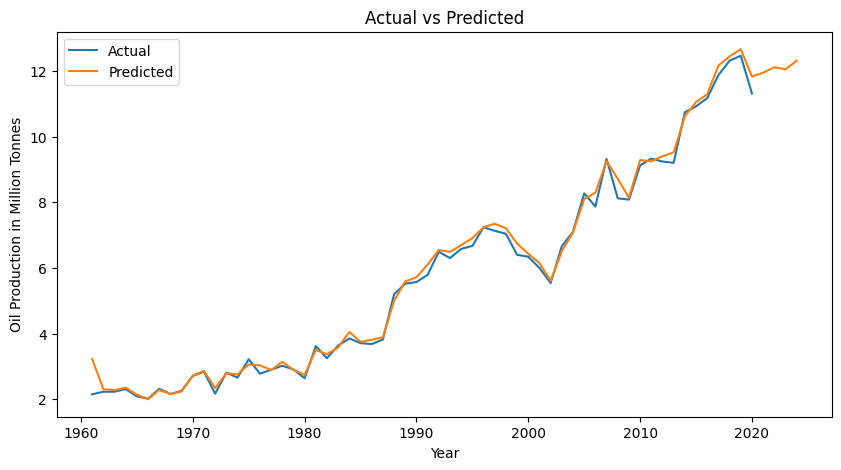

In [131]:
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Production'], label = "Actual")
plt.plot(df3['Year'], df3['Predictions'], label = "Predicted")
plt.xlabel('Year')
plt.ylabel('Oil Production in Million Tonnes')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()